In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid")

# Задание 1 


Загрузим данные `flight_delays.csv`

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6_semester/flight_delays.csv', sep=',')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


Надо найти:

* долю всех задержек ко всем вылетам
* зависимость количества задержек от длины пути, который предстоит пролететь самолёту
* топ 5 направлений, для которых чаще всего происходят задержки
* в какие времена года чаще всего происходят задержки рейсов
* топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
* топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
* необычную зависимость количества задержек от имеющихся данных

Построим долю всех задержек ко всем вылетам.

In [4]:
df['dep_delayed_15min'].value_counts(normalize=True)

N    0.80956
Y    0.19044
Name: dep_delayed_15min, dtype: float64

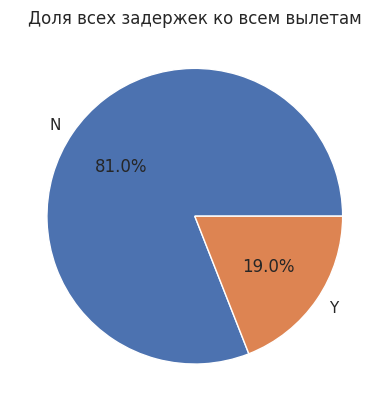

In [6]:
plt.pie(df['dep_delayed_15min'].value_counts(normalize=True), labels = ['N', 'Y'],
        autopct = '%1.1f%%')
plt.title("Доля всех задержек ко всем вылетам");

Построим зависимость количества задержек от длины пути, который предстоит пролететь самолёту.


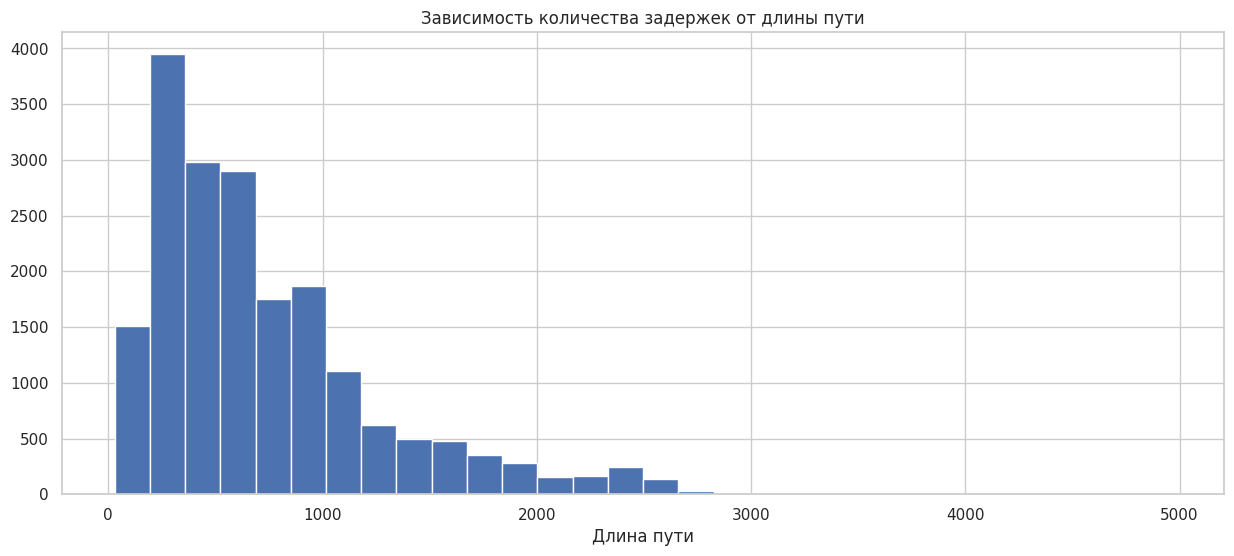

In [91]:
plt.figure(figsize=(15, 6))

mask = df.dep_delayed_15min == 'Y'
plt.hist(df[mask].Distance, bins=30)

plt.title("Зависимость количества задержек от длины пути")
plt.xlabel('Длина пути')
plt.show();

В какие времена года чаще всего происходят задержки рейсов.

In [8]:
season = {'winter' : ['c-1', 'c-2', 'c-12'],
          'spring' : ['c-3', 'c-4', 'c-5'],
          'summer' : ['c-6', 'c-7', 'c-8'],
          'autumn' : ['c-9', 'c-10', 'c-11']}
season = {x: y for y in season.keys() for x in season[y]}

In [9]:
df['season'] = df['Month'].replace(season, inplace=False)

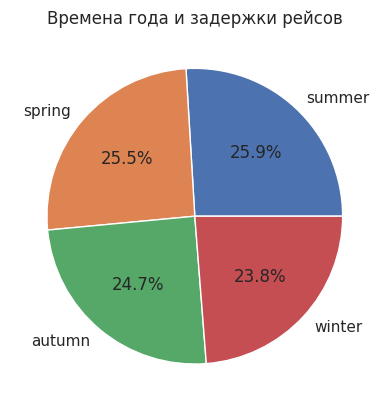

In [10]:
data = df['season'].value_counts(normalize=True)
plt.pie(data, labels = data.index,
        autopct = '%1.1f%%')
plt.title("Времена года и задержки рейсов");

Топ 5 направлений, для которых чаще всего происходят задержки

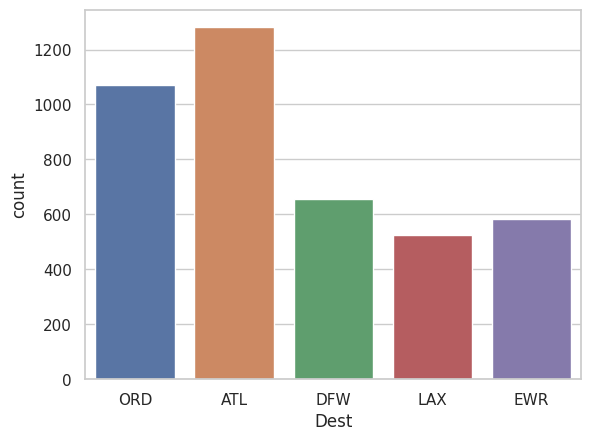

In [93]:
'''
считаем количество задержек для каждого направления и выводим топ 5 
'''
mask1 = df.dep_delayed_15min == 'Y'
mask2 = np.in1d(df.Dest[mask1], df.Dest[mask1].value_counts()[:5].index)
sns.countplot(x = 'Dest', data=df[mask1][mask2]);

Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы.

Будем считать абсолютное значение, без нормировки на количество рейсов. argmin(количество задержек)

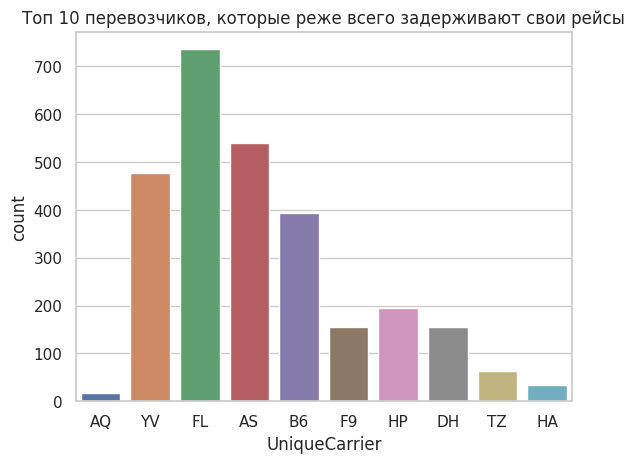

In [95]:
'''
считаем количество задержек для каждого перевозчика и выводим топ 10 с конца 
'''
mask1 = df.dep_delayed_15min == 'Y'
mask = np.in1d(df[mask1].UniqueCarrier, df[mask1].UniqueCarrier.value_counts()[-10:].index)
sns.countplot(x = 'UniqueCarrier', data=df[mask1][mask])
plt.title('Топ 10 перевозчиков, которые реже всего задерживают свои рейсы');

Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

Как и в предыдущих пунктах здесь считается абсолютное значение

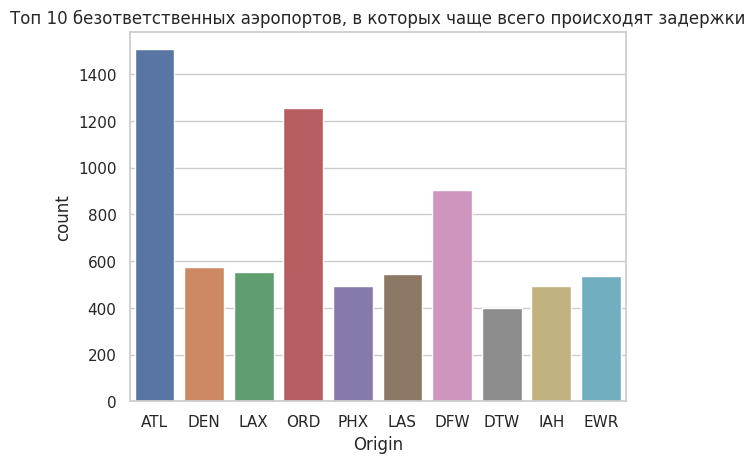

In [96]:
mask1 = df.dep_delayed_15min == 'Y'
mask = np.in1d(df.Origin[mask1], df.Origin[mask1].value_counts()[:10].index)
sns.countplot(x = 'Origin', data=df[mask1][mask])
plt.title('Топ 10 безответственных аэропортов, в которых чаще всего происходят задержки');

Пусть необычной зависимостью будет нормализация второй зависимости из списка :)

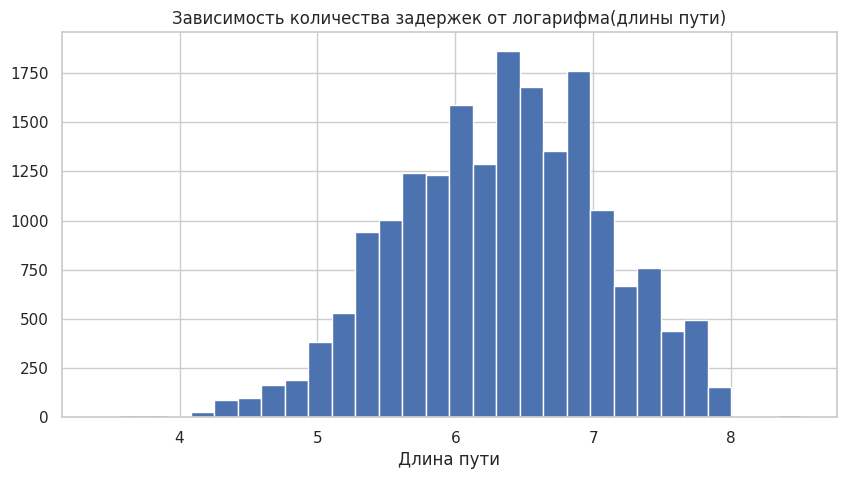

In [99]:
plt.figure(figsize=(10, 5))

mask = df.dep_delayed_15min == 'Y'
plt.hist(np.log(df[mask].Distance), bins=30)

plt.title("Зависимость количества задержек от логарифма(длины пути)")
plt.xlabel('Длина пути')
plt.show();

# Задание 3

Text(0, 0.5, 'Height')

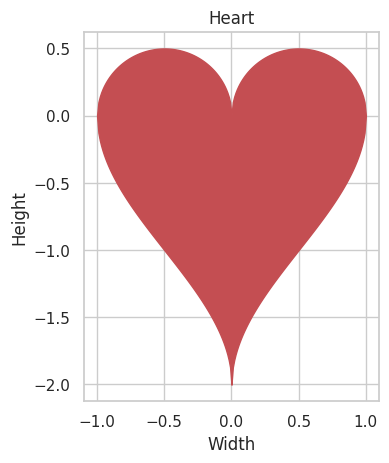

In [90]:
#plt.figure(figsize=(5,5))
x = np.linspace(-1, 0, 100)
y_up = np.sqrt(1 - 4*(x+1/2)**2)/2

y_down = (np.arccos(2*x + 1) - np.pi)*2/np.pi

plt.fill_between(x,     y_up, y_down      , color='r')
plt.fill_between(x + 1, y_up, y_down[::-1], color='r')

plt.gca().set_aspect('equal', 'box')
plt.title('Heart')
plt.xlabel('Width')
plt.ylabel('Height')

# Задание 5* (Red High Heel)

In [78]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/6_semester/red-high-heel-original-resized.jpg')

Посмотрим на размер картинки

In [27]:
img.shape

(800, 800, 3)

Создадим сетку $x$ и $y$

In [79]:
N = 800
x = np.linspace(0, 1, 800)
y = np.linspace(0, 1, 800)
xv, yv = np.meshgrid(x, y)

In [80]:
img = img.reshape(-1, 3)

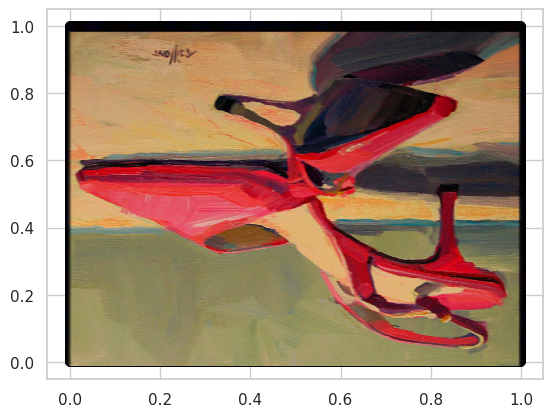

In [81]:
plt.scatter(xv, yv, marker='o', color=img/255);